In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv("../input/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.drop("customerID",axis=1,inplace=True)

In [6]:
df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.Dependents=df.Dependents.replace({"No":0, "Yes":1})
df.Partner=df.Partner.replace({"No":0, "Yes":1})
df.PhoneService=df.PhoneService.replace({"No":0, "Yes":1})
df.OnlineSecurity=df.OnlineSecurity.replace({"No":0,"No internet service":0, "Yes":1})
df.OnlineBackup=df.OnlineBackup.replace({"No":0,"No internet service":0, "Yes":1})
df.DeviceProtection=df.DeviceProtection.replace({"No":0,"No internet service":0, "Yes":1})
df.StreamingTV=df.StreamingTV.replace({"No":0,"No internet service":0,"Yes":1})
df.StreamingMovies=df.StreamingMovies.replace({"No":0,"No internet service":0, "Yes":1})
df.PaperlessBilling=df.PaperlessBilling.replace({"No":0, "Yes":1})
df.TechSupport=df.TechSupport.replace({"No":0,"No internet service":0, "Yes":1})
df.Churn=df.Churn.replace({"No":0, "Yes":1})
df.MultipleLines=df.MultipleLines.replace({"No":0,"No phone service":0,"Yes":1})

In [8]:
df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


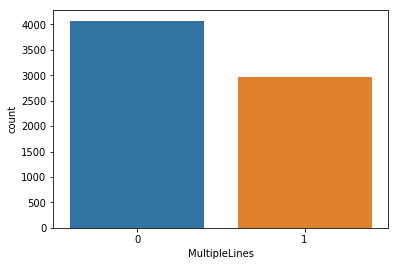

In [9]:
sns.countplot("MultipleLines",data=df)
plt.show()


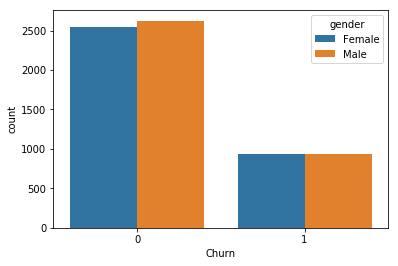

In [10]:
sns.countplot("Churn",data=df,hue="gender")
plt.show()


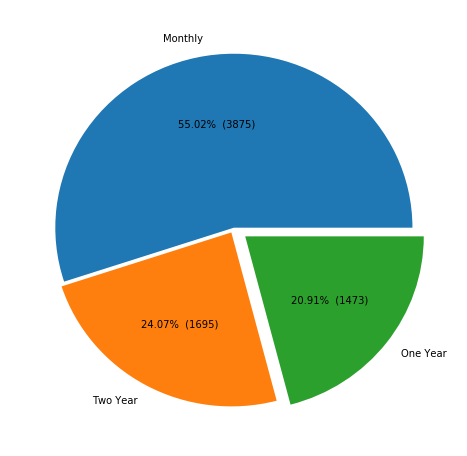

In [11]:
a=list(df["Contract"].value_counts().values)
def make_autopct(a):
    def my_autopct(pct):
        total = sum(a)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(a,labels=["Monthly","Two Year","One Year"],explode=(0.001,0.03,0.08), autopct=make_autopct(a))
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

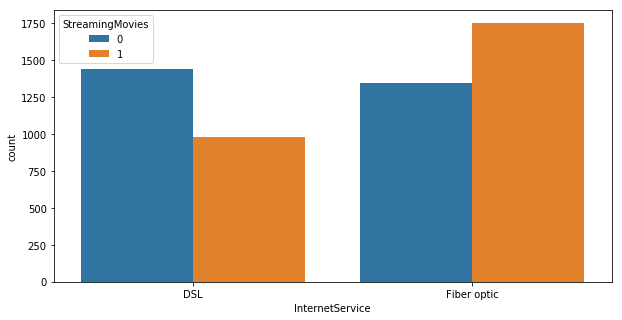

In [12]:
df1=df[(df["InternetService"]=="DSL") | (df["InternetService"]== "Fiber optic")]
sns.countplot("InternetService",data=df1,hue="StreamingMovies")
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.show()


ValueError: too many values to unpack (expected 2)

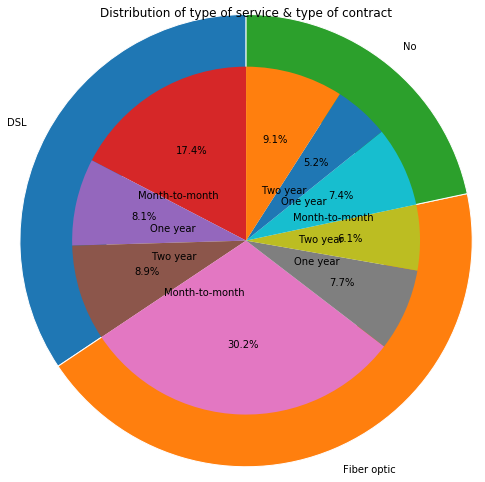

In [13]:
group_size=list(df.InternetService.value_counts().values)
group_names=list(df.InternetService.value_counts().index)
a=df.groupby([df.InternetService,df.Contract],as_index=False).count()
ddf = pd.DataFrame({"service":a.InternetService,"contract":a.Contract,"value":a.gender})
subgroup_size=list(list(ddf.value.values))
subgroup_names=list(ddf.contract.values)

temp=group_size[0]
group_size[0]=group_size[1]
group_size[1]=temp
temp1=group_names[0]
group_names[0]=group_names[1]
group_names[1]=temp1

fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names,startangle=90)
plt.setp( mypie, width=0.5, edgecolor='white')
fig.set_size_inches(8,8)
plt.title('Distribution of type of service & type of contract')
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.3,startangle=90,autopct='%.1f%%')
plt.setp( mypie2, width=0.4, edgecolor='white')

plt.margins(0,0)

plt.show()


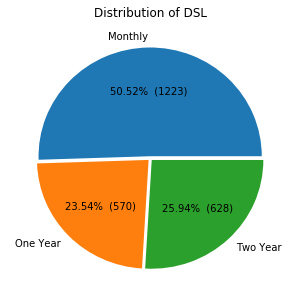

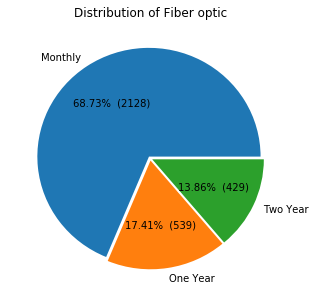

In [14]:
a=df.groupby([df.InternetService,df.Contract],as_index=False).count()
dsl=list(ddf[ddf.service=="DSL"].value)
fib=list(ddf[ddf.service=="Fiber optic"].value)

def make_autopct(dsl):
    def my_autopct(pct):
        total = sum(dsl)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


plt.pie(dsl,labels=["Monthly","One Year","Two Year"],autopct=make_autopct(dsl),explode=(0.02,0.02,0.02),)
plt.title("Distribution of DSL")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

plt.pie(fib,labels=["Monthly","One Year","Two Year"],autopct=make_autopct(fib),explode=(0.02,0.02,0.02),)
plt.title("Distribution of Fiber optic")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


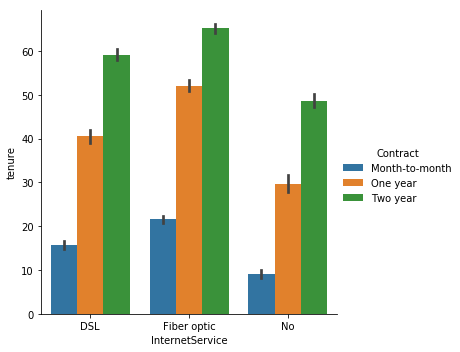

In [15]:
sns.catplot(x="InternetService", y="tenure", hue="Contract", kind="bar", data=df)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


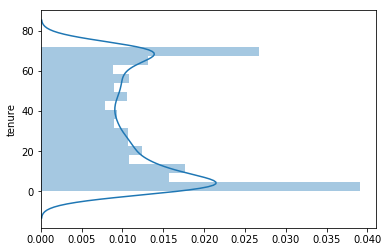

In [16]:
sns.distplot(df["tenure"],hist=True,vertical=True)

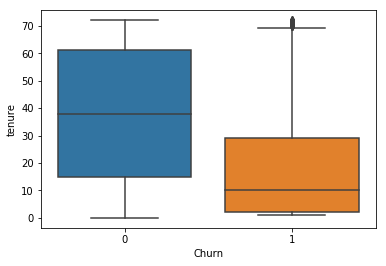

In [17]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.show()

**PREDICTION**

In [18]:
d=pd.get_dummies(df.InternetService)
df=pd.concat([df, d], axis=1)
e=pd.get_dummies(df.Contract)
df=pd.concat([df, e], axis=1)
df=df.drop(["InternetService","Contract","PaymentMethod","TotalCharges","MonthlyCharges"],axis=1)
df.gender=df.gender.replace({"Female":0, "Male":1})

In [19]:
X=df.loc[:,df.columns!="Churn"].values
y=df.loc[:,df.columns=="Churn"].values.flatten()


In [20]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

81.90205819730305


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
#Model 2 - Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
modelrf = RandomForestClassifier(n_estimators=2,oob_score=True,min_samples_leaf = 40)
modelrf.fit(X_train,y_train)
y_predrf=modelrf.predict(X_test)
print(accuracy_score(y_test,y_predrf)*100)

80.34066713981547


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:463: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [23]:
#Model 3 - Support Vector Machine
from sklearn import svm
modelsvm=svm.SVC(kernel="linear")
modelsvm.fit(X_train,y_train)
y_predsvm=modelsvm.predict(X_test)
print(accuracy_score(y_test,y_predsvm)*100)

81.97303051809794
